<a href="https://colab.research.google.com/github/xu-pu/colab-notebooks/blob/master/pendulum_hamiltonian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pendulum

In [64]:
from sympy import *
init_printing()

In [65]:
t, g, l, m, ddq = symbols('t g l m \ddot{q}')
q = Function('q')(t)
dq = Function('\dot{q}')(t)

diff_rules = [
    (q.diff(t), dq),
    (dq.diff(t), ddq)
]

In [66]:
x = l * sin(q)
y = - l * cos(q)

dx = x.diff(t).subs(diff_rules)
dy = y.diff(t).subs(diff_rules)

dx, dy

In [67]:
T = S.Half * m * (dx**2 + dy**2)
V = m * g * y
L = T - V
L = simplify(L)
L

In [68]:
eq = L.diff(dq).diff(t) - L.diff(q)
eq = eq.subs(diff_rules)
eq = simplify(eq)
eq

In [69]:
sol = solve(eq,ddq)[0]
sol

In [70]:
p = Function('p')(t)
dq_of_p = solve(Eq(p, L.diff(dq)), dq)[0]
dq_of_p

In [71]:
legendre_transform = [(dq, dq_of_p)]

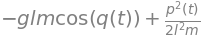

In [72]:
H = p * dq_of_p - L.subs(legendre_transform)
H = simplify(H)
H

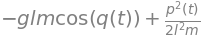

In [73]:
simplify((T+V).subs(legendre_transform))

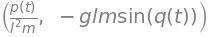

In [74]:
he_dq = H.diff(p)
he_dp = -H.diff(q)
he_dq, he_dp

# Hamiltonian Equation in Matrix Form

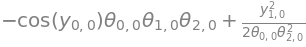

In [75]:
Y = MatrixSymbol('y', 2, 1)
theta = MatrixSymbol('theta', 3, 1)

rules = [
    (q, Y[0,0]), 
    (p, Y[1,0]),
    (m, theta[0,0]),
    (g, theta[1,0]),
    (l, theta[2,0])    
]

H_of_Y = H.subs(rules)
H_of_Y

In [76]:
def gradient(Y,X):
  assert(X.shape[1] == 1)
  return Matrix([Y.diff(x) for x in X])

gradient(H_of_Y, Y)

⎡sin(y₀₀)⋅θ₀₀⋅θ₁₀⋅θ₂₀⎤
⎢                    ⎥
⎢        y₁₀         ⎥
⎢      ────────      ⎥
⎢             2      ⎥
⎣      θ₀₀⋅θ₂₀       ⎦

In [77]:
def possion_matrix(ydim: int):
  return Matrix([
      [zeros(ydim), eye(ydim)],
      [-eye(ydim), zeros(ydim)]
  ])

possion_matrix(1)

⎡0   1⎤
⎢     ⎥
⎣-1  0⎦

In [78]:
dY = possion_matrix(1) * gradient(H_of_Y,Y)
dY

⎡        y₁₀          ⎤
⎢      ────────       ⎥
⎢             2       ⎥
⎢      θ₀₀⋅θ₂₀        ⎥
⎢                     ⎥
⎣-sin(y₀₀)⋅θ₀₀⋅θ₁₀⋅θ₂₀⎦